<a href="https://colab.research.google.com/github/emanuel379/Regressao-I/blob/main/An%C3%A1lise_de_Regress%C3%A3o_com_dados_de_felicidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
import pylab

#**Visualização de dados**

In [2]:
df1 = pd.read_csv('Life expectancy.csv')
df2 = pd.read_csv('Suicide Rate.csv')
df2 = df2.drop('Country', axis = 1)
df = pd.concat([df1, df2], axis = 1)
df['GDP per capita'] = df['GDP per capita'].replace(',', '', regex=True).astype(float)
df

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
0,Afghanistan,60.6,68.2,3.794,4.7,1105.0,20.6
1,Albania,74.8,81.3,4.959,1.7,4932.0,32.4
2,Algeria,73.3,78.9,5.605,2.9,4534.0,15.6
3,Andorra,81.7,84.8,6.955,1.4,46622.0,18.9
4,Angola,58.1,65.6,4.105,5.3,2077.0,20.5
...,...,...,...,...,...,...,...
137,Qatar,78.1,82.5,6.420,2.3,39720.0,11.1
138,Singapore,82.5,85.9,6.710,1.2,65112.0,14.0
139,United Arab Emirates,76.3,80.6,6.390,2.6,6792.0,27.8
140,United States,76.1,81.1,6.940,1.7,NaN,NaN


In [ ]:
# Dividindo os dados com base no gênero
life_expectancy_male = df['Life Expectancy (years) - Men']
life_expectancy_female = df['Life Expectancy (years) - Women']

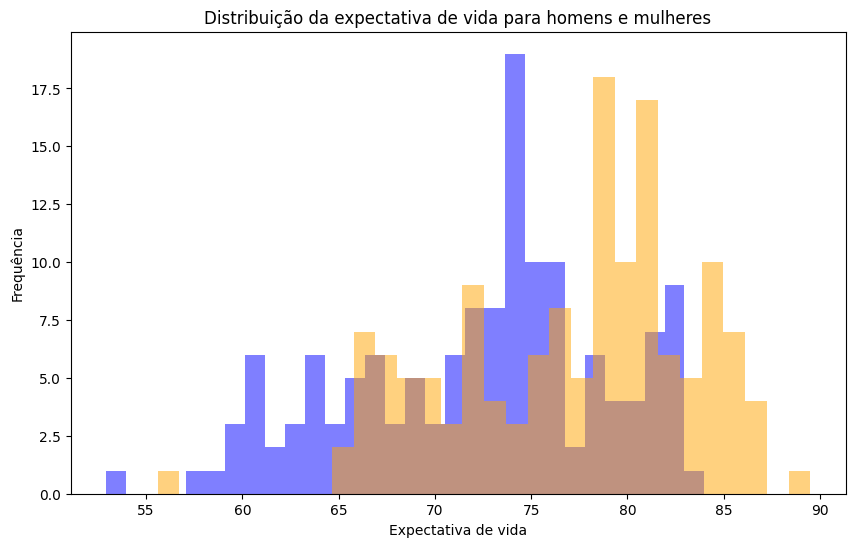

In [ ]:
# Plotando os histogramas
plt.figure(figsize=(10, 6))

plt.hist(life_expectancy_male, bins=30, alpha=0.5, label='Homens', color='blue')
plt.hist(life_expectancy_female, bins=30, alpha=0.5, label='Mulheres', color='orange')

plt.xlabel('Expectativa de vida')
plt.ylabel('Frequência')
plt.title('Distribuição da expectativa de vida para homens e mulheres')

plt.show()

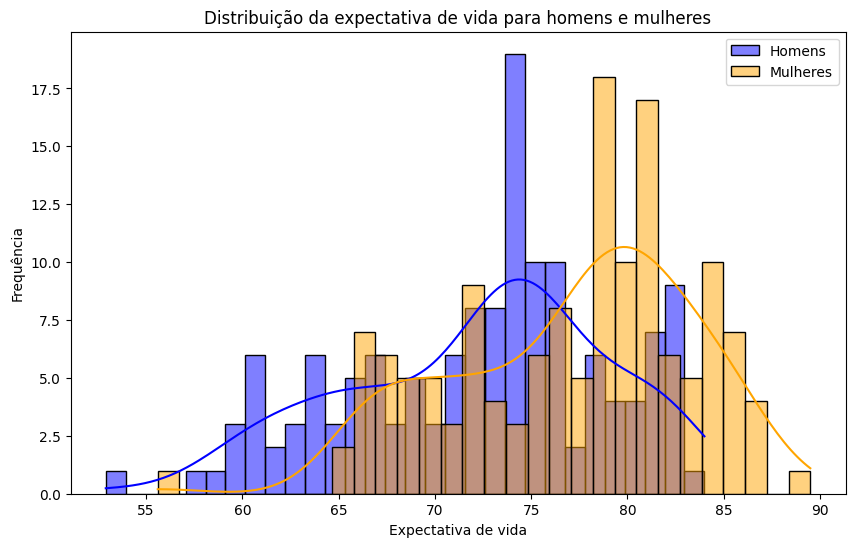

In [ ]:
# Plotando os histogramas e as densidades alisadas
plt.figure(figsize=(10, 6))

# Histogramas com densidade alisada
sns.histplot(life_expectancy_male, bins=30, kde=True, label='Homens', color='blue')
sns.histplot(life_expectancy_female, bins=30, kde=True, label='Mulheres', color='orange')

plt.xlabel('Expectativa de vida')
plt.ylabel('Frequência')
plt.title('Distribuição da expectativa de vida para homens e mulheres')
plt.legend()

plt.show()

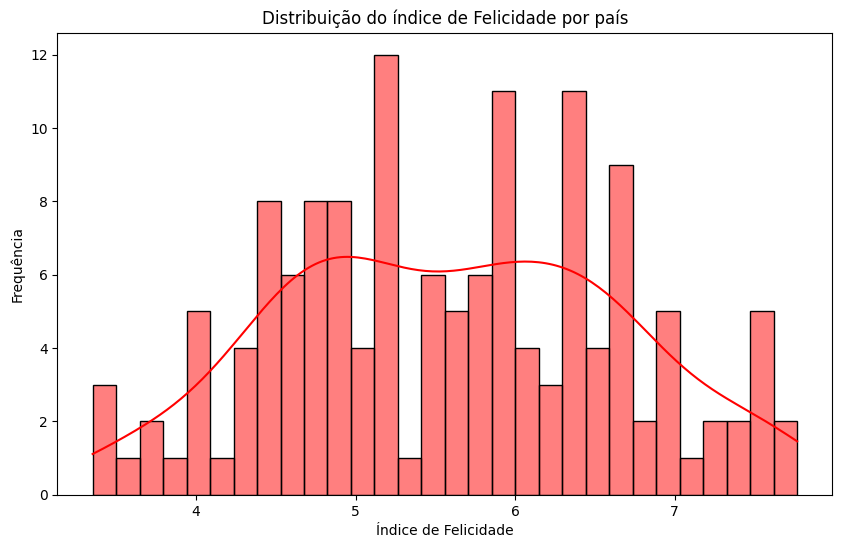

In [ ]:
# Plotando os histogramas
plt.figure(figsize=(10, 6))

sns.histplot(df['Happiness Score'], bins=30, kde=True, color='red')

plt.xlabel('Índice de Felicidade')
plt.ylabel('Frequência')
plt.title('Distribuição do índice de Felicidade por país')

plt.show()

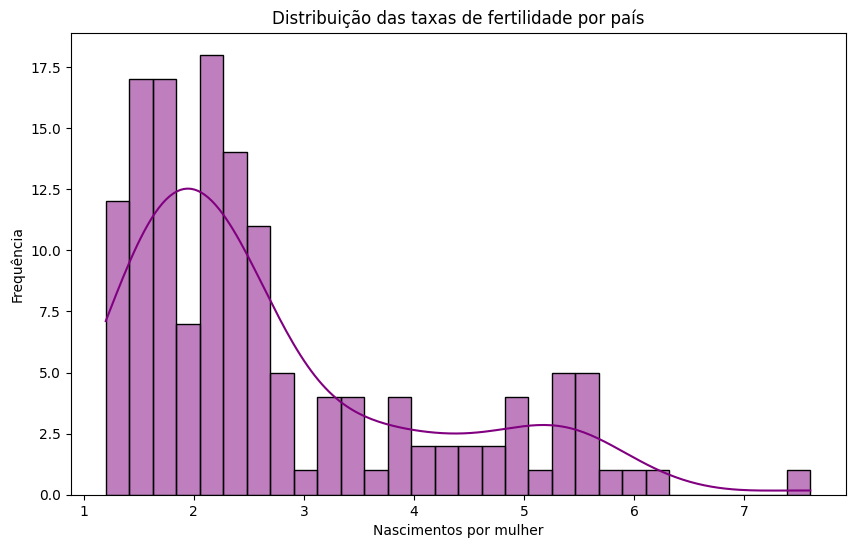

In [ ]:
# Plotando os histogramas
plt.figure(figsize=(10, 6))

sns.histplot(df['Fertility Rate (births per woman)'], bins=30, kde=True, color='purple')

plt.xlabel('Nascimentos por mulher')
plt.ylabel('Frequência')
plt.title('Distribuição das taxas de fertilidade por país')
plt.show()

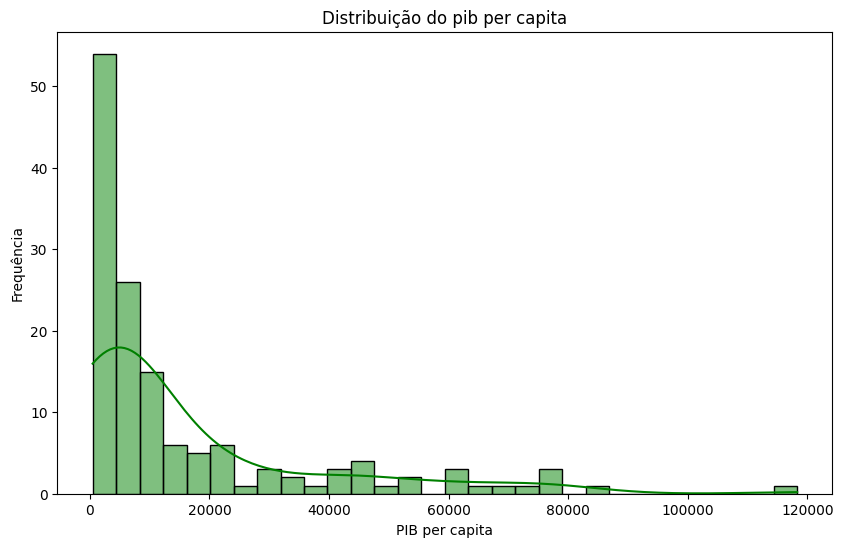

In [ ]:
# Plotando os histogramas
plt.figure(figsize=(10, 6))

sns.histplot(df['GDP per capita'], bins=30, kde=True, color='green')

plt.xlabel('PIB per capita')
plt.ylabel('Frequência')
plt.title('Distribuição do pib per capita')

plt.show()

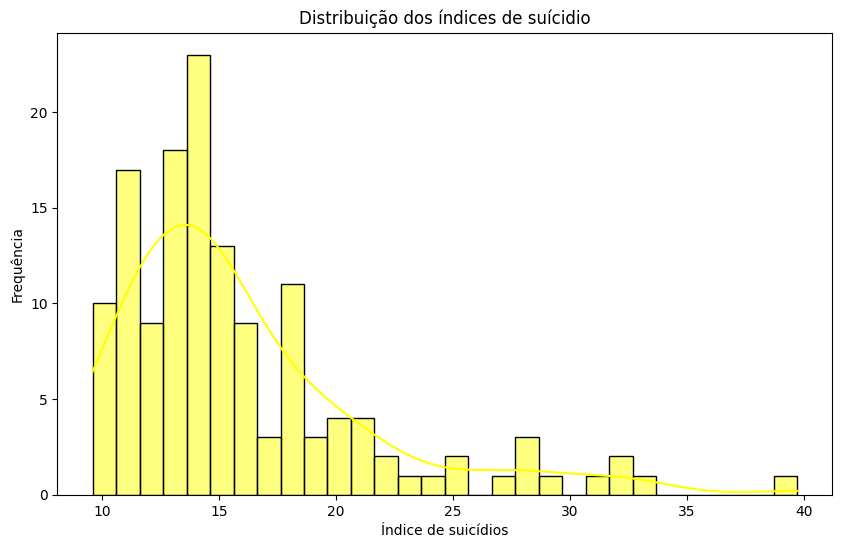

In [ ]:
# Plotando os histogramas
plt.figure(figsize=(10, 6))

sns.histplot(df['Suicide rate'], bins=30, kde=True, color='yellow')

plt.xlabel('Índice de suicídios')
plt.ylabel('Frequência')
plt.title('Distribuição dos índices de suícidio')

plt.show()

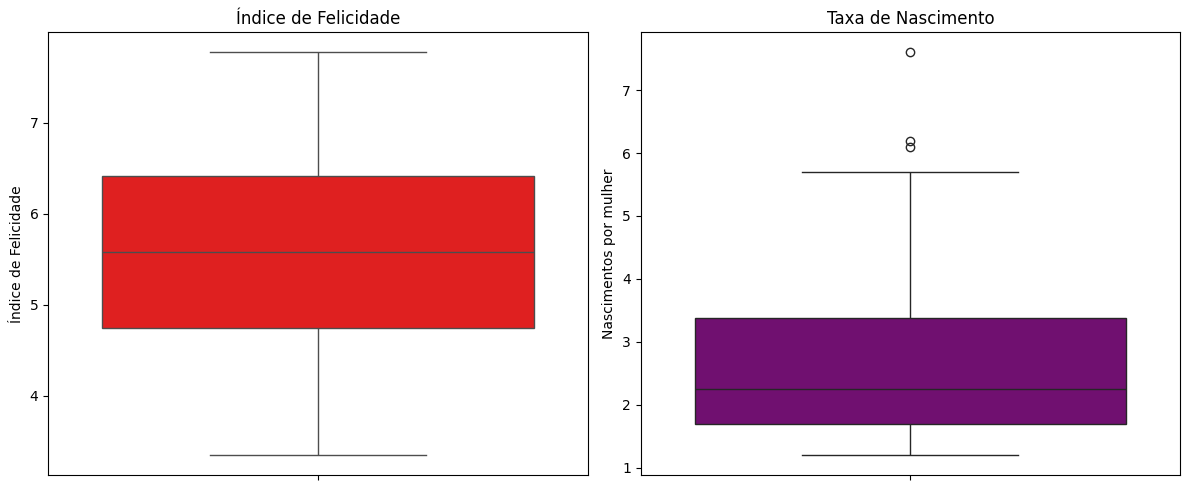

In [ ]:
# Plotando os boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Happiness Score', color='Red', data=df)
plt.title('Índice de Felicidade')
plt.ylabel('Índice de Felicidade')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fertility Rate (births per woman)', color='Purple', data=df)
plt.title('Taxa de Nascimento')
plt.ylabel('Nascimentos por mulher')

plt.tight_layout()
plt.show()

<ipython-input-197-70af32f30325>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Life_Expectancy', data=df_melted, palette={'Homens': 'blue',


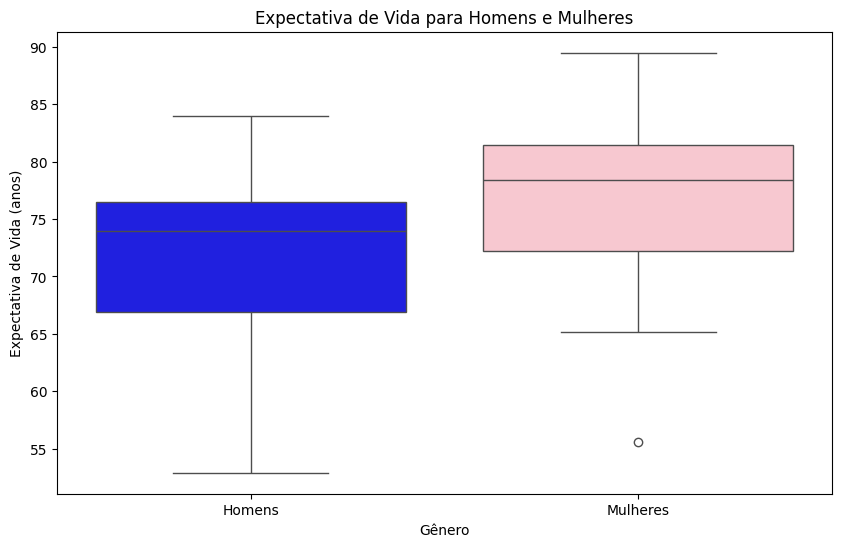

In [ ]:
# Melt the DataFrame for combined plotting
df_melted = pd.melt(df, value_vars=['Life Expectancy (years) - Men', 'Life Expectancy (years) - Women'],
                     var_name='Gender', value_name='Life_Expectancy')

# Replace column names for better labels
df_melted['Gender'] = df_melted['Gender'].replace({
    'Life Expectancy (years) - Men': 'Homens',
    'Life Expectancy (years) - Women': 'Mulheres'
})

# Plotando os boxplots
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Gender', y='Life_Expectancy', data=df_melted, palette={'Homens': 'blue',
                                                                      'Mulheres': 'pink'})

plt.xlabel('Gênero')
plt.ylabel('Expectativa de Vida (anos)')
plt.title('Expectativa de Vida para Homens e Mulheres')
plt.show()

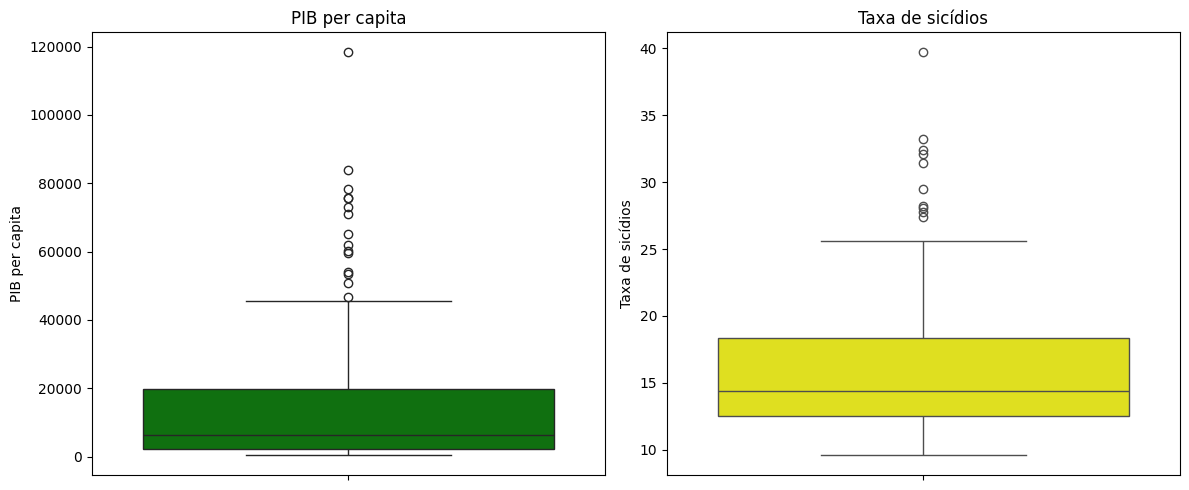

In [ ]:
# Plotando os boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='GDP per capita', color='Green', data=df)
plt.title('PIB per capita')
plt.ylabel('PIB per capita')

plt.subplot(1, 2, 2)
sns.boxplot(y='Suicide rate', color='Yellow', data=df)
plt.title('Taxa de sicídios')
plt.ylabel('Taxa de sicídios')

plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

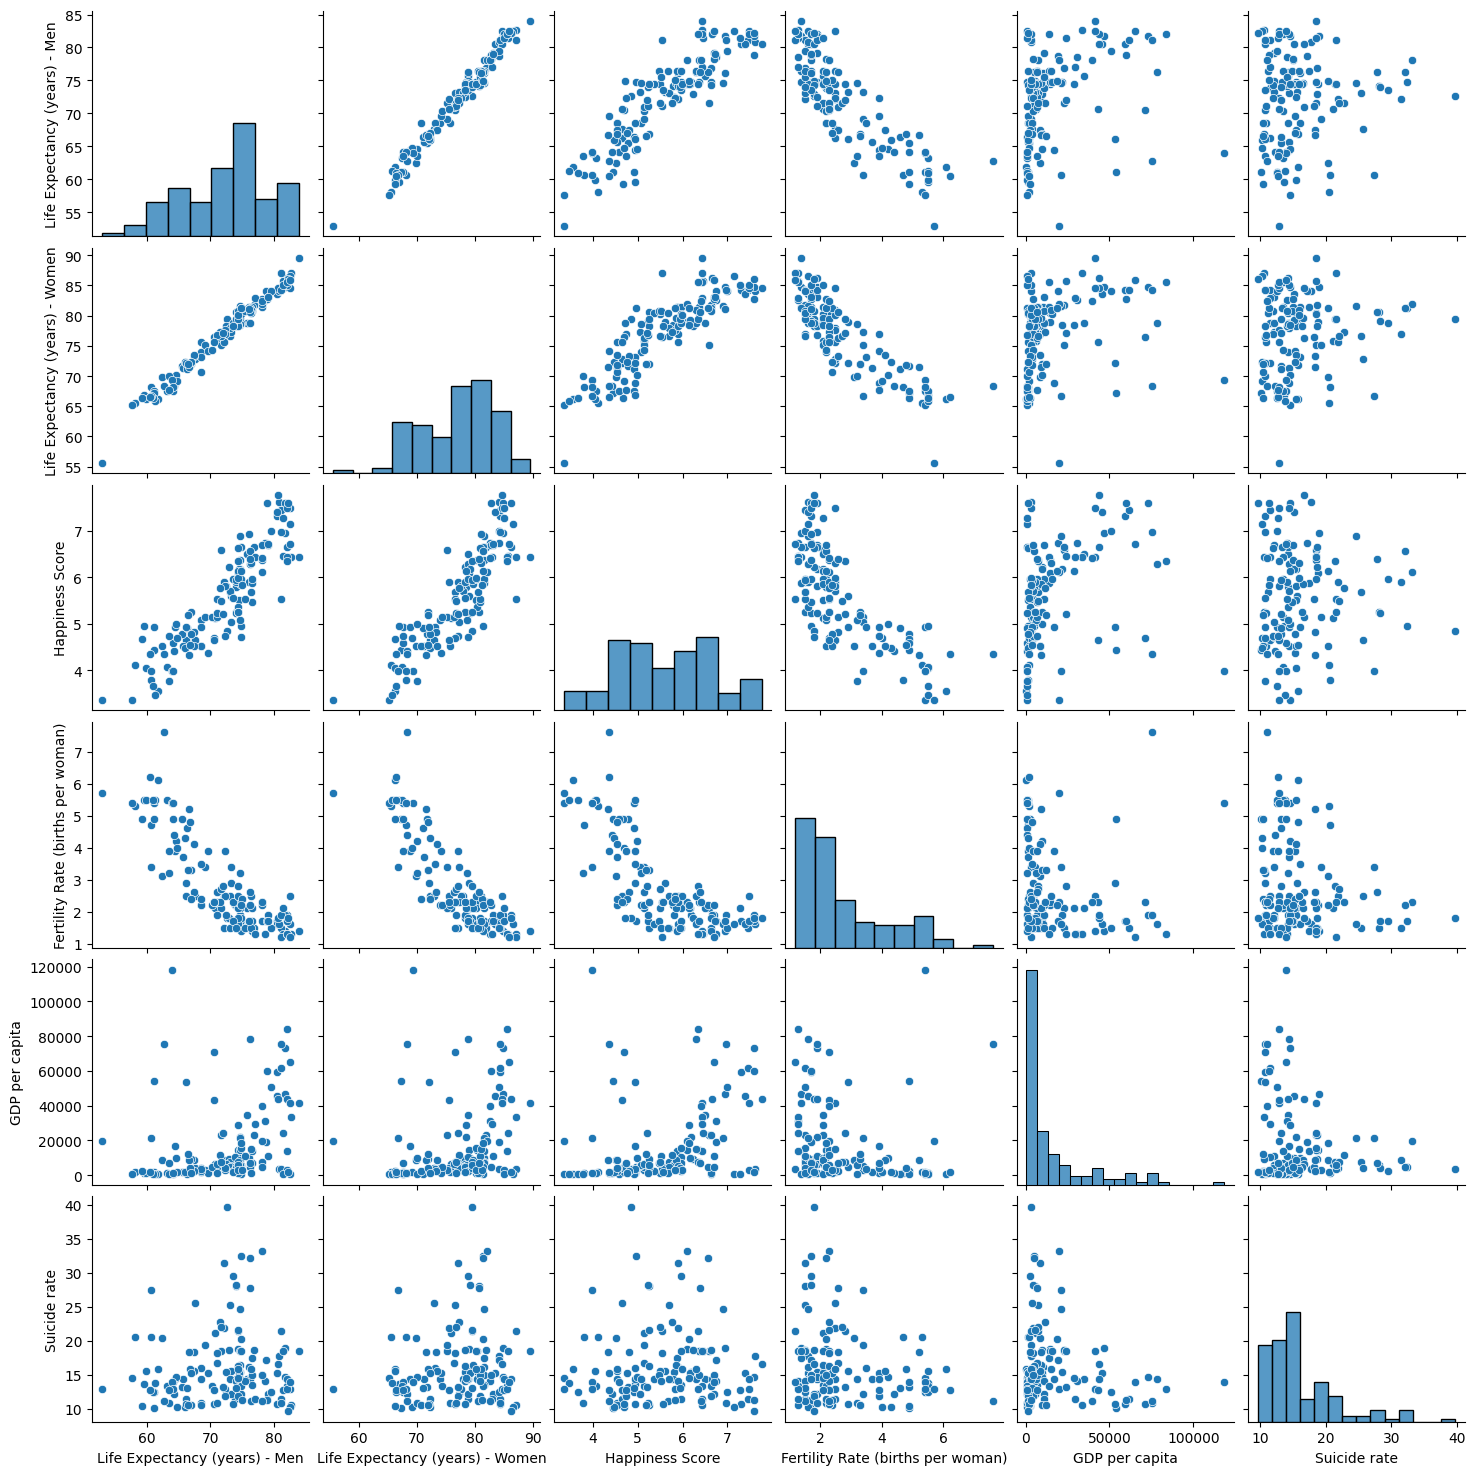

In [ ]:
# Observando os diagramas de dispersão das variáveis

plt.figure(figsize = (16, 10))
sns.pairplot(df)
plt.show()

<Axes: >

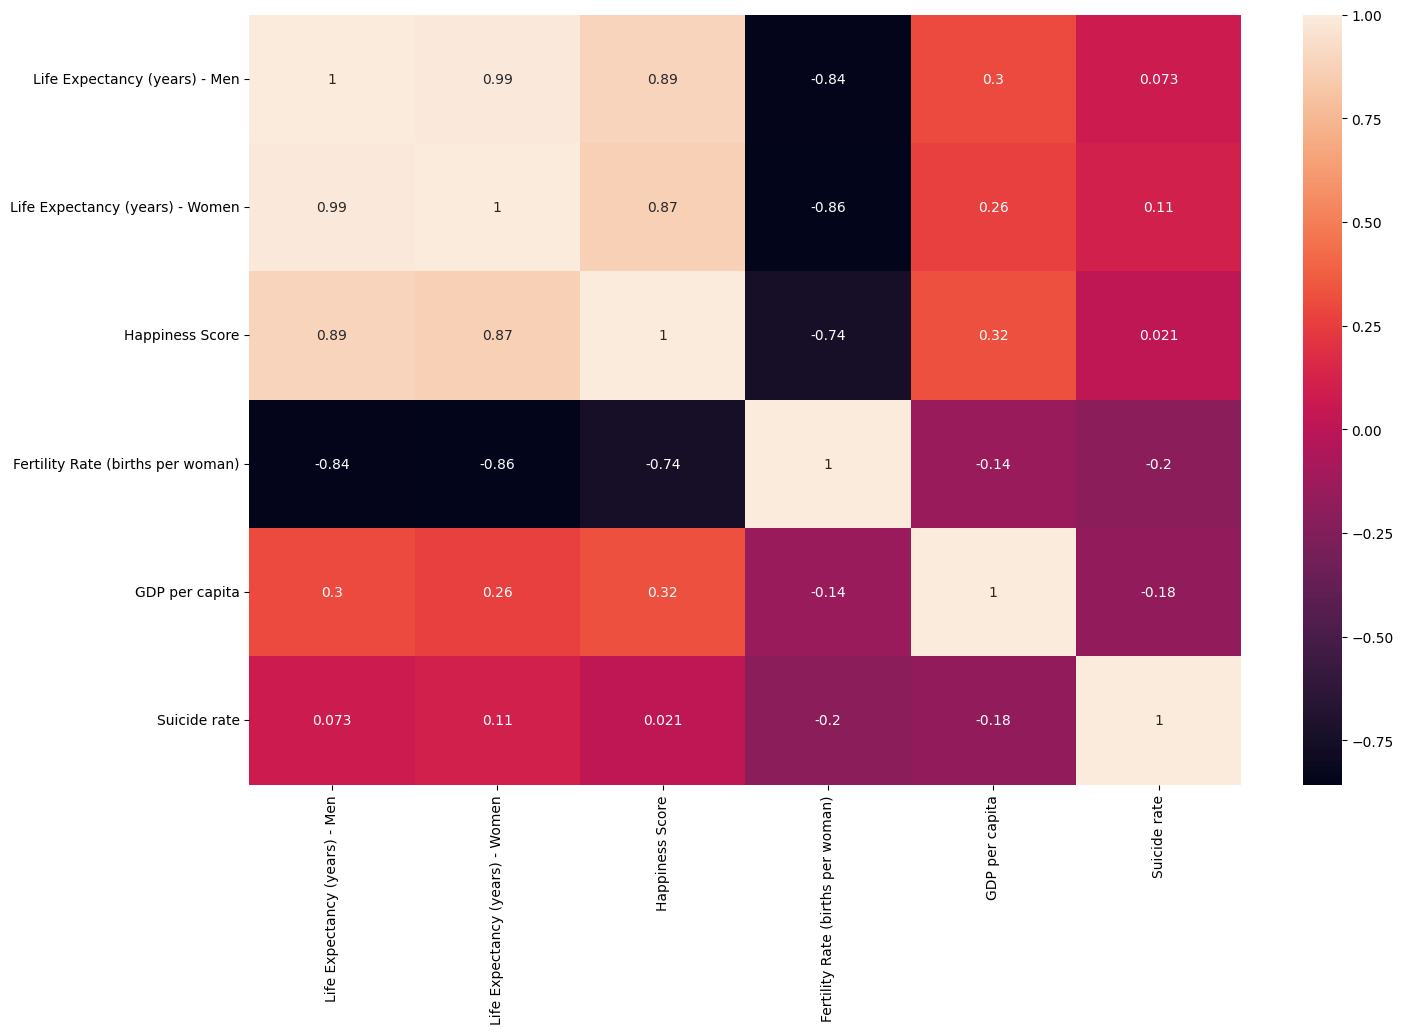

In [ ]:
# Observando o diagrama de correlação para cada variável

# Retirando a variável categórica
df1 = df.drop(columns = ['Country'])

plt.figure(figsize = (16, 10))
sns.heatmap(df1.corr(), annot = True) # Mapa de calor, onde  annot insere os valores dentro das ilhas

Como é possível observar pelos diagramas de dispersão e pelo heatmap, as variáveis "Happiness Score", "Life Expectancy (years) - Men", "Life Expectancy (years) - Women" e "Fertility Rate (births per woman) possuem elevada correlação entre si, índice superior a |0.7|, o que pode ser algo positivo, visto que é possível observar que a influência de uma determinada covariável sobre a resposta é significativa no modelo simples, mas pode afetar a interpretação dos resultados em um modelo de regressão múltipla, posto que acarreta em multicolinearidade entre as escolhidas como variáveis preditoras, o que acaba por contestar o pressuposto de independência entre as covariáveis do modelo. Já as variáveis "GDP per capita" e "Suicide rate" apresentam correlação fraca, inferior a |0.5|, entre si e com as demais, não sendo, entretanto, negligenciáveis para o ajuste de algum modelo de regressão linear.

#**Regressão Linear Simples**

Considerando "Happiness Score" como variável resposta e "Life Expectancy (years) - Men", "Life Expectancy (years) - Women", "Fertility Rate (births per woman)", "GDP per capita" e "Suicide rate" como variáveis preditoras, temos que os modelos de regressão linear simples para cada uma das preditoras são dados a seguir:

**1.** Modelo "Happiness Score" resposta e "Life Expectancy (years) - Men" variável preditora\independente

In [ ]:
# Modelo "Happiness Score" resposta e "Life Expectancy (years) - Men" variável preditora\independente
X = df['Life Expectancy (years) - Men']
y = df['Happiness Score']

# Adicionando constante às variáveis independentes para a inclusão do intercepto
X = sm.add_constant(X)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     508.3
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.92e-48
Time:                        20:00:14   Log-Likelihood:                -99.982
No. Observations:                 142   AIC:                             204.0
Df Residuals:                     140   BIC:                             209.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

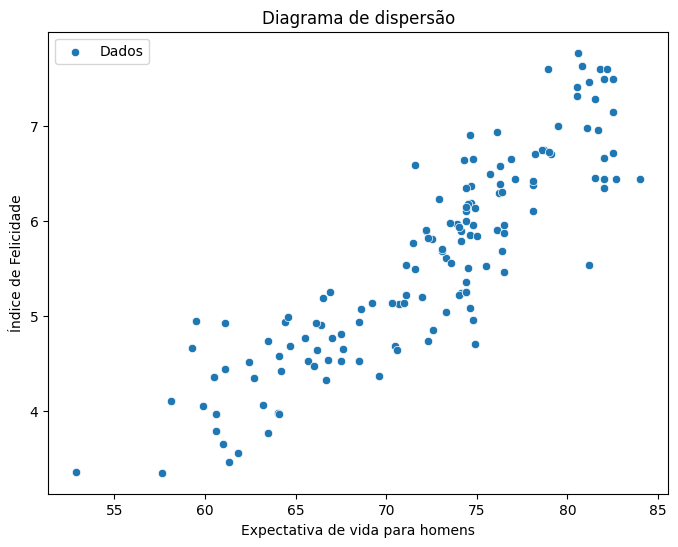

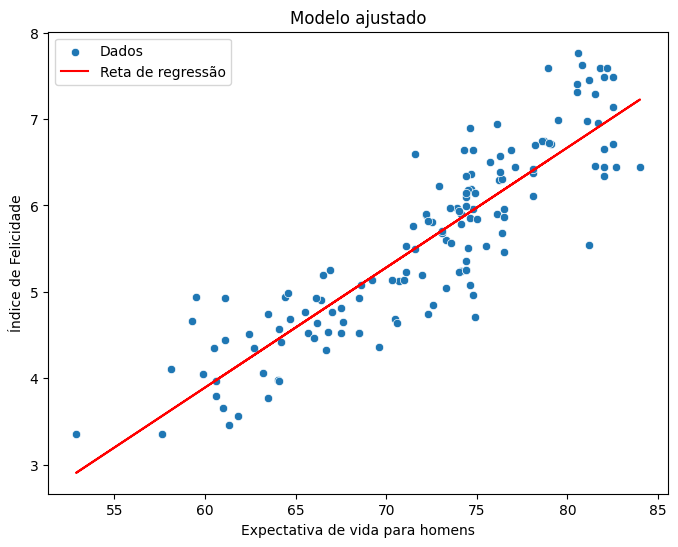

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Life Expectancy (years) - Men', y = 'Happiness Score', data = df, label = 'Dados')

plt.xlabel('Expectativa de vida para homens')
plt.ylabel('Índice de Felicidade')
plt.title('Diagrama de dispersão')
plt.legend()
plt.show()

# Ajustando o modelo
X = df['Life Expectancy (years) - Men'].values.reshape(-1, 1)  # Reformulando para 2D
y = df['Happiness Score']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Life Expectancy (years) - Men', y = 'Happiness Score', data = df, label = 'Dados')
plt.plot(X, model.predict(X), color='red', label='Reta de regressão')

plt.xlabel('Expectativa de vida para homens')
plt.ylabel('Índice de Felicidade')
plt.title('Modelo ajustado')
plt.legend()
plt.show()

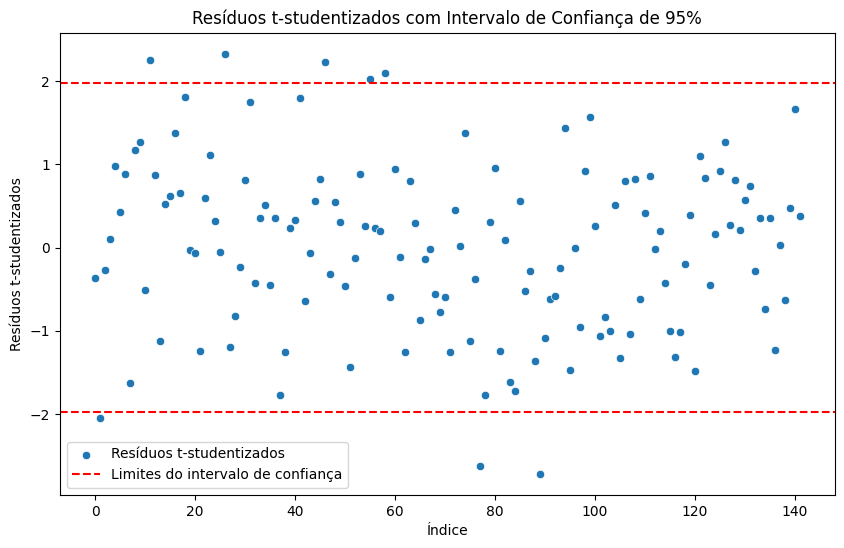

In [ ]:
# Calculando os resíduos
y_pred = model.predict(X)
residuos = y - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(df)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

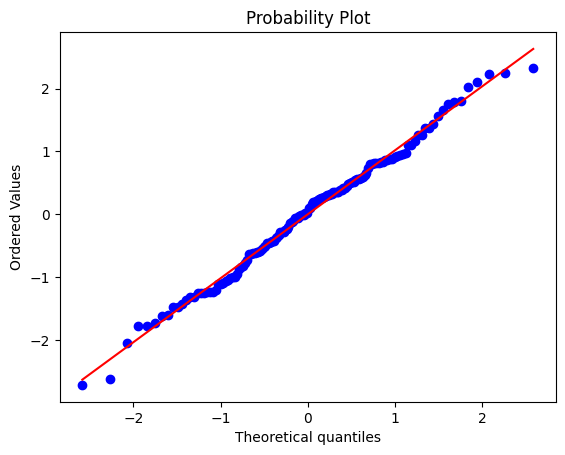

In [ ]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

**2.** Modelo "Happiness Score" resposta e "Life Expectancy (years) - Women" variável preditora\independente

In [ ]:
# Modelo "Happiness Score" resposta e "Life Expectancy (years) - Men" variável prditora\independente
X = df['Life Expectancy (years) - Women']
y = df['Happiness Score']

# Adicionando constante às variáveis independentes para a inclusão do intercepto
X = sm.add_constant(X)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     430.3
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.55e-44
Time:                        20:00:16   Log-Likelihood:                -109.08
No. Observations:                 142   AIC:                             222.2
Df Residuals:                     140   BIC:                             228.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

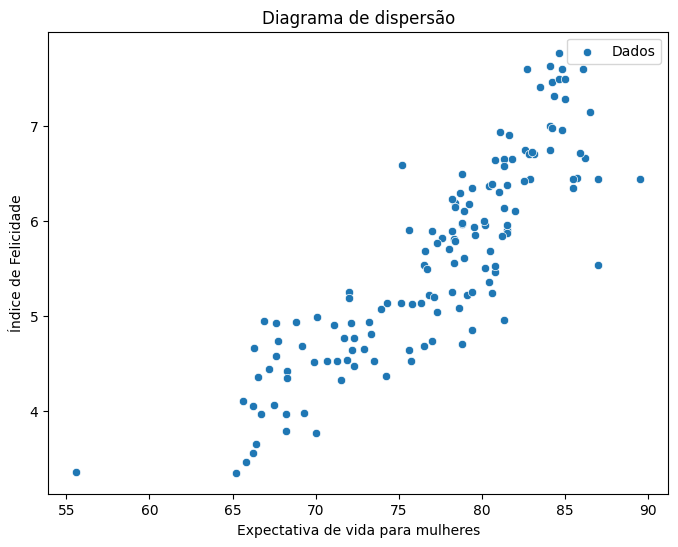

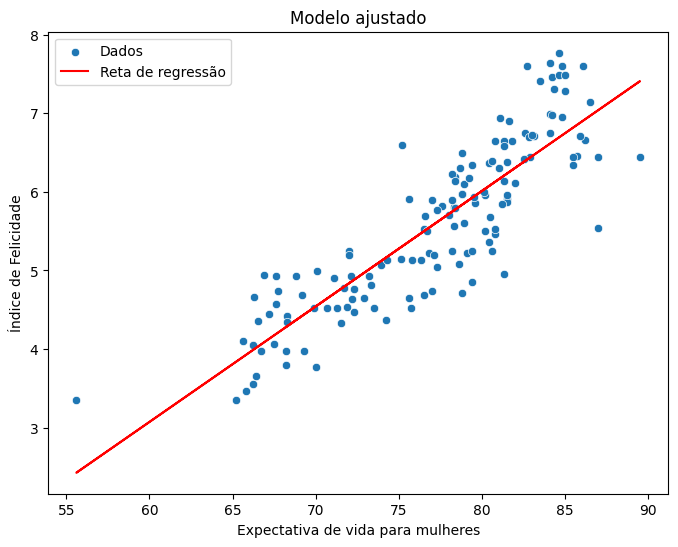

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Life Expectancy (years) - Women', y = 'Happiness Score', data = df, label = 'Dados')

plt.xlabel('Expectativa de vida para mulheres')
plt.ylabel('Índice de Felicidade')
plt.title('Diagrama de dispersão')
plt.legend()
plt.show()

# Ajustando o modelo
X = df['Life Expectancy (years) - Women'].values.reshape(-1, 1)  # Reformulando para 2D
y = df['Happiness Score']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Life Expectancy (years) - Women', y = 'Happiness Score', data = df, label = 'Dados')
plt.plot(X, model.predict(X), color='red', label='Reta de regressão')

plt.xlabel('Expectativa de vida para mulheres')
plt.ylabel('Índice de Felicidade')
plt.title('Modelo ajustado')
plt.legend()
plt.show()

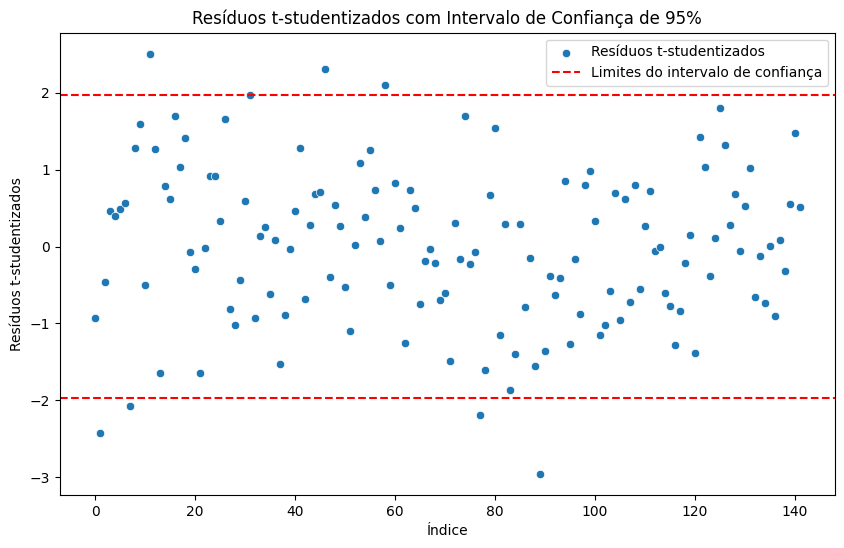

In [ ]:
# Calculando os resíduos
y_pred = model.predict(X)
residuos = y - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(df)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

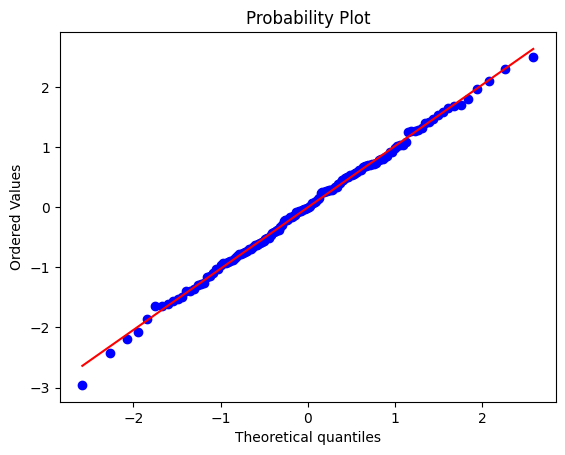

In [ ]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

**3.** Modelo "Happiness Score" resposta e "Fertility Rate (births per woman)" variável preditora\independente

In [ ]:
# Modelo "Happiness Score" resposta e "Fertility Rate (births per woman)" variável prditora\independente
X = df['Fertility Rate (births per woman)']
y = df['Happiness Score']

# Adicionando constante às variáveis independentes para a inclusão do intercepto
X = sm.add_constant(X)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     173.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.13e-26
Time:                        20:00:18   Log-Likelihood:                -151.69
No. Observations:                 142   AIC:                             307.4
Df Residuals:                     140   BIC:                             313.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

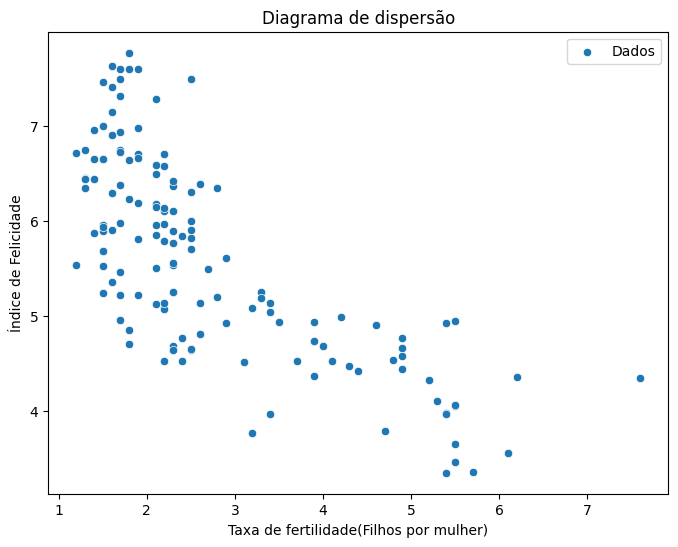

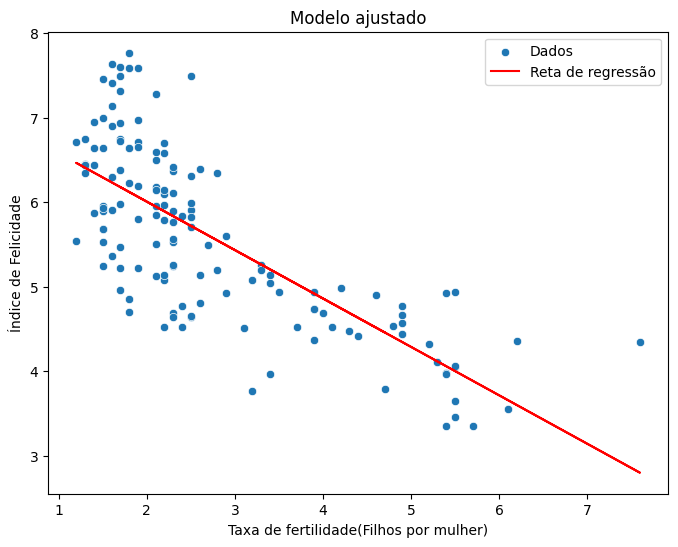

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Fertility Rate (births per woman)', y = 'Happiness Score', data = df, label = 'Dados')

plt.xlabel('Taxa de fertilidade(Filhos por mulher)')
plt.ylabel('Índice de Felicidade')
plt.title('Diagrama de dispersão')
plt.legend()
plt.show()

# Ajustando o modelo
X = df['Fertility Rate (births per woman)'].values.reshape(-1, 1)  # Reformulando para 2D
y = df['Happiness Score']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Fertility Rate (births per woman)', y = 'Happiness Score', data = df, label = 'Dados')
plt.plot(X, model.predict(X), color='red', label='Reta de regressão')

plt.xlabel('Taxa de fertilidade(Filhos por mulher)')
plt.ylabel('Índice de Felicidade')
plt.title('Modelo ajustado')
plt.legend()
plt.show()

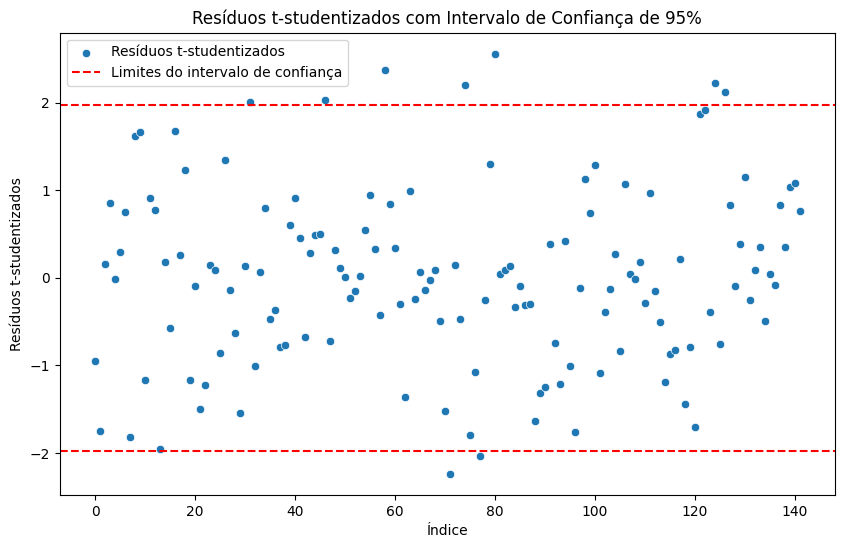

In [ ]:
# Calculando os resíduos
y_pred = model.predict(X)
residuos = y - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(df)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

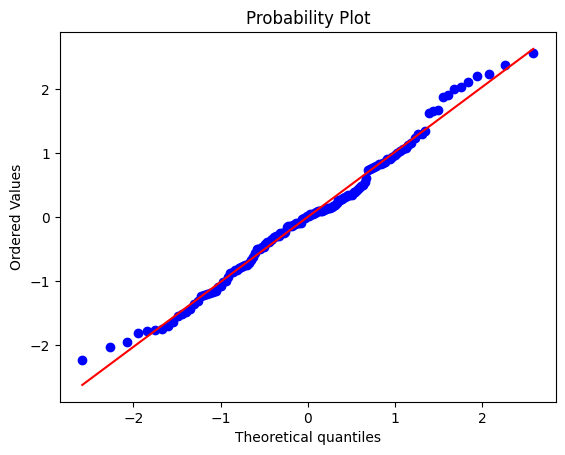

In [ ]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

**4.** Modelo "Happiness Score" resposta e "GDP per capita" variável preditora\independente

In [5]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Verificar e exibir valores NaN
if numeric_df.isnull().values.any():
    print("Há valores NaN no DataFrame.")
    print(numeric_df.isnull().sum())
    print("Linhas com valores NaN:")
    print(numeric_df[numeric_df.isnull().any(axis=1)])
else:
    print("Não há valores NaN no DataFrame.")

# Verificar e exibir valores infinitos
if np.isinf(numeric_df.values).any():
    print("Há valores infinitos no DataFrame.")
    print(np.isinf(numeric_df).sum())
    print("Linhas com valores infinitos:")
    print(numeric_df[np.isinf(numeric_df).any(axis=1)])
else:
    print("Não há valores infinitos no DataFrame.")

Há valores NaN no DataFrame.
Life Expectancy (years) - Men        0
Life Expectancy (years) - Women      0
Happiness Score                      0
Fertility Rate (births per woman)    0
GDP per capita                       2
Suicide rate                         2
dtype: int64
Linhas com valores NaN:
     Life Expectancy (years) - Men  Life Expectancy (years) - Women  \
140                           76.1                             81.1   
141                           79.0                             83.0   

     Happiness Score  Fertility Rate (births per woman)  GDP per capita  \
140             6.94                                1.7             NaN   
141             6.72                                1.7             NaN   

     Suicide rate  
140           NaN  
141           NaN  
Não há valores infinitos no DataFrame.


In [6]:
# Retirando valores nan para os modelos 4 e 5
df_per_capita = df.dropna(subset=['GDP per capita'])
df_per_capita

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
0,Afghanistan,60.6,68.2,3.794,4.7,1105.0,20.6
1,Albania,74.8,81.3,4.959,1.7,4932.0,32.4
2,Algeria,73.3,78.9,5.605,2.9,4534.0,15.6
3,Andorra,81.7,84.8,6.955,1.4,46622.0,18.9
4,Angola,58.1,65.6,4.105,5.3,2077.0,20.5
...,...,...,...,...,...,...,...
135,Poland,77.1,82.9,6.442,1.3,29542.0,11.5
136,Portugal,82.0,85.5,6.346,1.3,83832.0,12.9
137,Qatar,78.1,82.5,6.420,2.3,39720.0,11.1
138,Singapore,82.5,85.9,6.710,1.2,65112.0,14.0


In [ ]:
# Modelo "Happiness Score" resposta e "GDP per capita" variável prditora\independente
X = df_per_capita['GDP per capita']
y = df_per_capita['Happiness Score']

# Adicionando constante às variáveis independentes para a inclusão do intercepto
X = sm.add_constant(X)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     16.11
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           9.74e-05
Time:                        20:00:19   Log-Likelihood:                -197.72
No. Observations:                 140   AIC:                             399.4
Df Residuals:                     138   BIC:                             405.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3250      0.105     50.

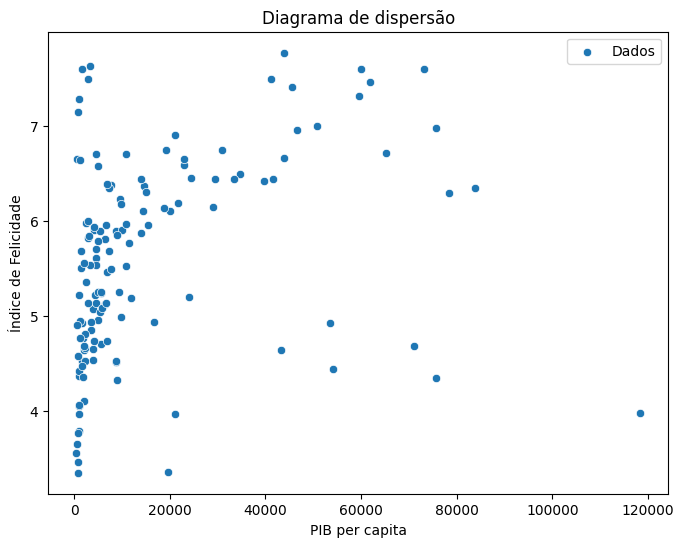

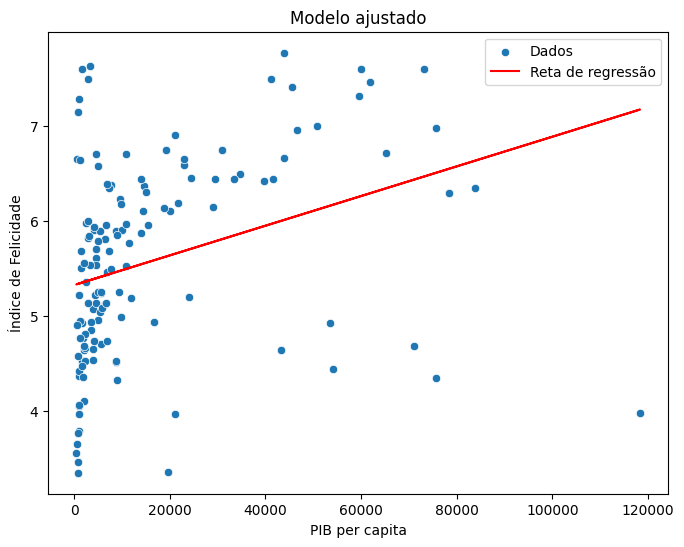

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'GDP per capita', y = 'Happiness Score', data = df_per_capita, label = 'Dados')

plt.xlabel('PIB per capita')
plt.ylabel('Índice de Felicidade')
plt.title('Diagrama de dispersão')
plt.legend()
plt.show()

# Ajustando o modelo
X = df_per_capita['GDP per capita'].values.reshape(-1, 1)  # Reformulando para 2D
y = df_per_capita['Happiness Score']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'GDP per capita', y = 'Happiness Score', data = df_per_capita, label = 'Dados')
plt.plot(X, model.predict(X), color='red', label='Reta de regressão')

plt.xlabel('PIB per capita')
plt.ylabel('Índice de Felicidade')
plt.title('Modelo ajustado')
plt.legend()
plt.show()

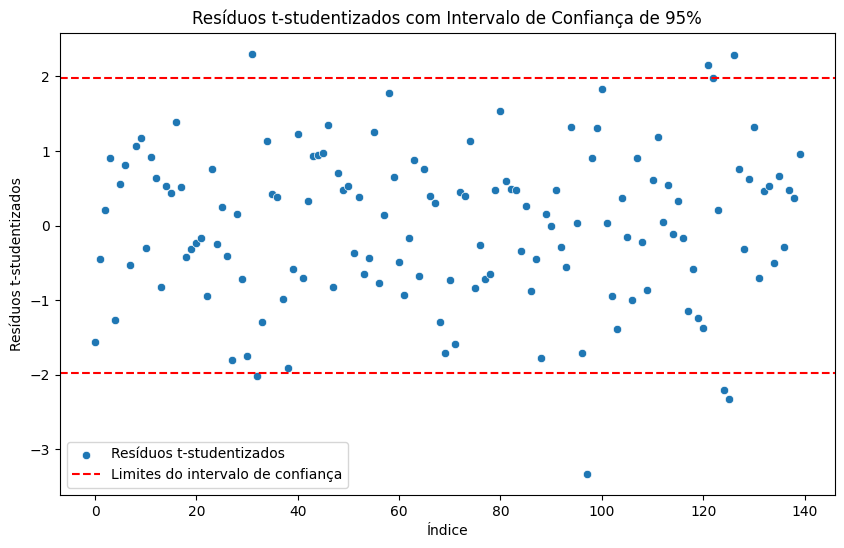

In [ ]:
# Calculando os resíduos
y_pred = model.predict(X)
residuos = y - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(df_per_capita)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_per_capita.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

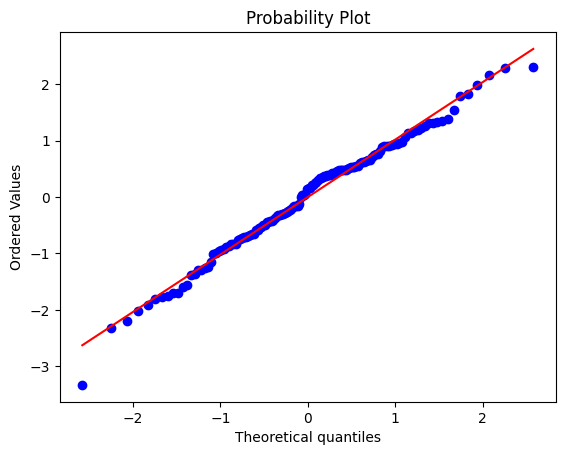

In [ ]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

**5.** Modelo "Happiness Score" resposta e "Suicide rate" variável preditora\independente

In [7]:
# Modelo "Happiness Score" resposta e "Suicide rate" variável prditora\independente
X = df_per_capita['Suicide rate']
y = df_per_capita['Happiness Score']

# Adicionando constante às variáveis independentes para a inclusão do intercepto
X = sm.add_constant(X)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.06012
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.807
Time:                        01:47:03   Log-Likelihood:                -205.42
No. Observations:                 140   AIC:                             414.8
Df Residuals:                     138   BIC:                             420.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5100      0.278     19.855   

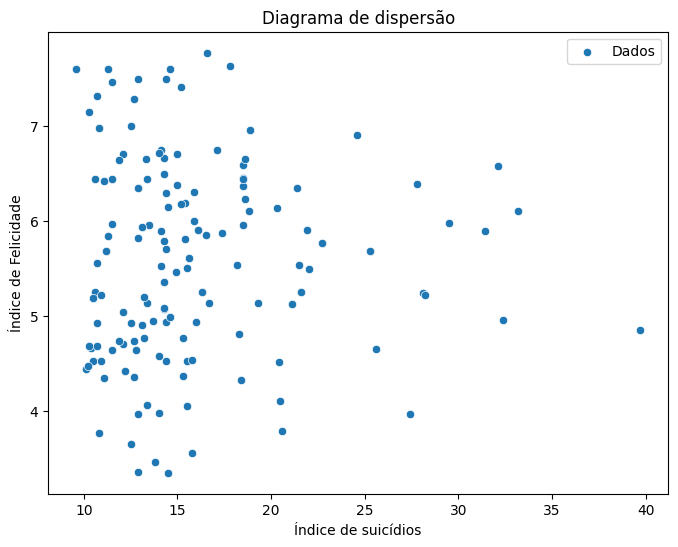

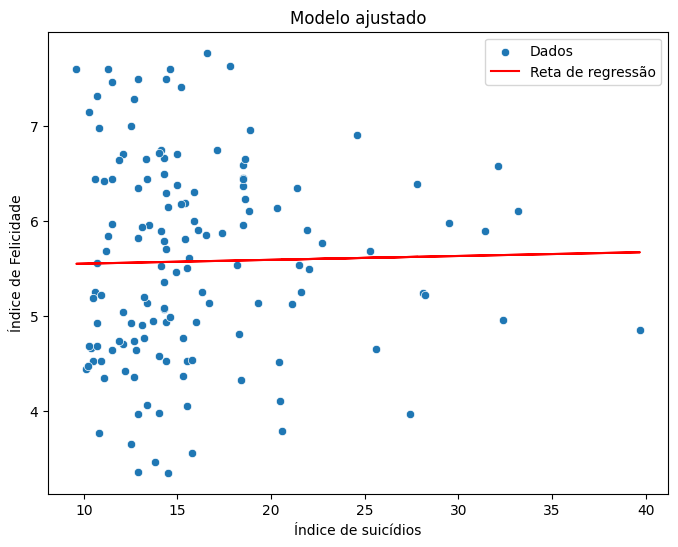

In [8]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Suicide rate', y = 'Happiness Score', data = df_per_capita, label = 'Dados')

plt.xlabel('Índice de suicídios')
plt.ylabel('Índice de Felicidade')
plt.title('Diagrama de dispersão')
plt.legend()
plt.show()

# Ajustando o modelo
X = df_per_capita['Suicide rate'].values.reshape(-1, 1)  # Reformulando para 2D
y = df_per_capita['Happiness Score']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Suicide rate', y = 'Happiness Score', data = df_per_capita, label = 'Dados')
plt.plot(X, model.predict(X), color='red', label='Reta de regressão')

plt.xlabel('Índice de suicídios')
plt.ylabel('Índice de Felicidade')
plt.title('Modelo ajustado')
plt.legend()
plt.show()

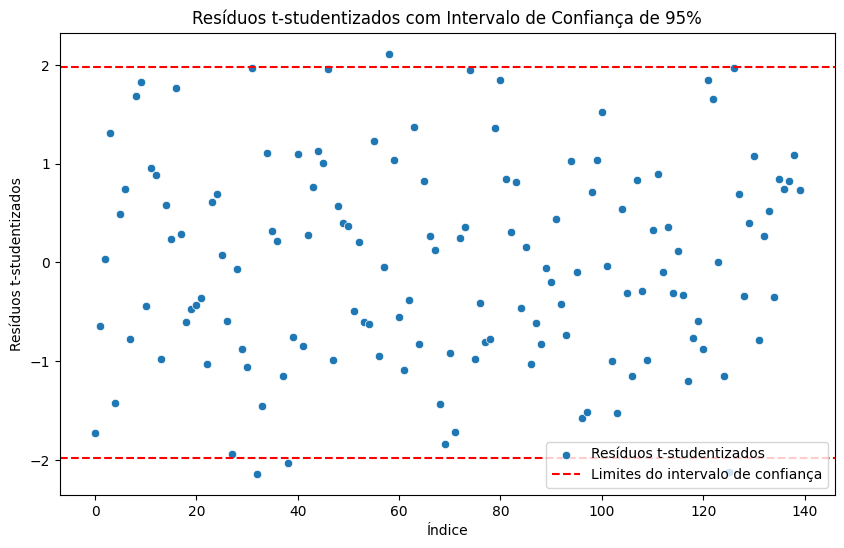

In [9]:
# Calculando os resíduos
y_pred = model.predict(X)
residuos = y - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(df_per_capita)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_per_capita.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

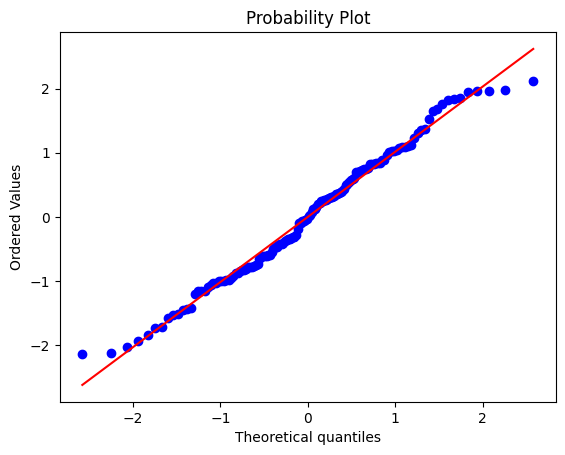

In [10]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

A partir da análise dos 5 modelos de regressão linear simples, temos que, é razoável concluir que os erros podem ser ditos Gaussianos, com base nos gráficos de dispersão e de aderência dos resíduos, os quais não apresentaram irregularidades seignificativas. Entretando, com base na visualização dos ajustes e do coeficiente R², temos que os modelos 4 e 5 não se adequam a um modelo linear, o qual se ajusta apenas razoávelmente ao modelo 3 e apresenta uma boa qualidade de ajuste aos modelos 1 e 2, algo que pode ser observado com base na correlação linear de pearson na seção "Visualização de dados", onde as covariáveis dos modelos 1 e 2 possuem correlação bastante forte com a variável resposta, enquanto as covariáveis dos modelos 4 e 5 possuem correlação bastante fraca, sendo a do modelo 5 pode ser considerado desprezível na predição da resposta.

#**Regressão Múltipla**

Devido à multicolinearidade e a presença de variáveis com baixa interação com a resposta, vamos utilizar uma Análise de Componentes Principais(PCA) para contornar esses problemas.

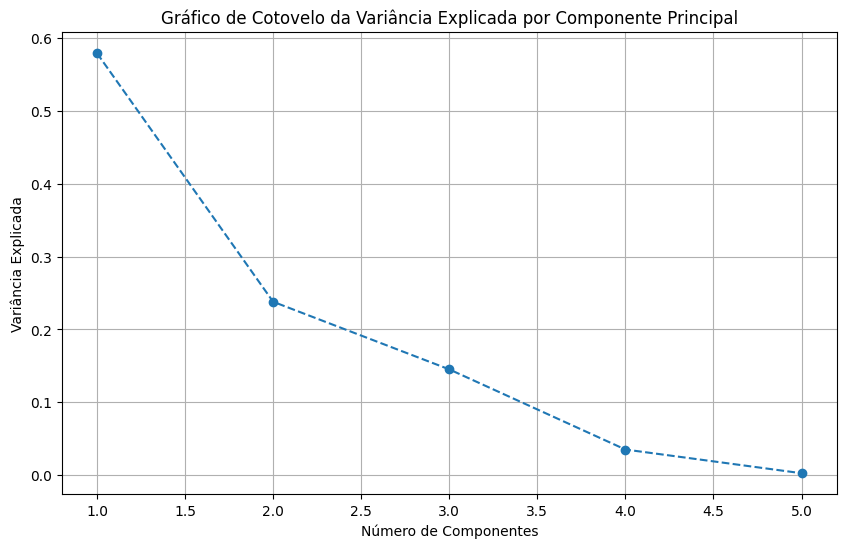

In [ ]:
# Preparando os dados
X = df_per_capita.drop(columns=['Country', 'Happiness Score'])
y = df_per_capita['Happiness Score']

# Padronizando as variáveis preditoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustando PCA com diferentes números de componentes
pca = PCA()
pca.fit(X_scaled)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Plotar o gráfico de cotovelo mostrando a variância explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada')
plt.title('Gráfico de Cotovelo da Variância Explicada por Componente Principal')
plt.grid(True)
plt.show()

O Gráfico de Cotovelo nos indica que o número ideal de componentes principais é 3.

In [ ]:
# Aplicando PCA para reduzir a dimensionalidade para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Adicionando constante às variáveis do PCA para a inclusão do intercepto
X = sm.add_constant(X_pca)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.07e-42
Time:                        20:00:22   Log-Likelihood:                -103.81
No. Observations:                 140   AIC:                             215.6
Df Residuals:                     136   BIC:                             227.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5744      0.044    127.993      0.0

Como é possíevel observar, a variável x3 pode ser dita insignificante, uma vez que inclui o 0 em seu intervalo de confiança.

Assim, podemos criar um modelo ainda mais simples, como o observado a seguir:

In [ ]:
# Removendo x3 do conjunto PCA
X = pd.DataFrame(X)
X = X.drop(columns = [3])

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     218.5
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.41e-43
Time:                        20:00:22   Log-Likelihood:                -105.17
No. Observations:                 140   AIC:                             216.3
Df Residuals:                     137   BIC:                             225.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              5.5744      0.044    127.216      0.0

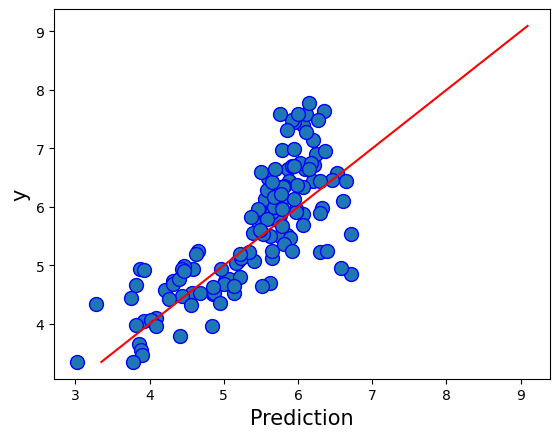

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.95 # fracao de elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r-')

plt.show(True)

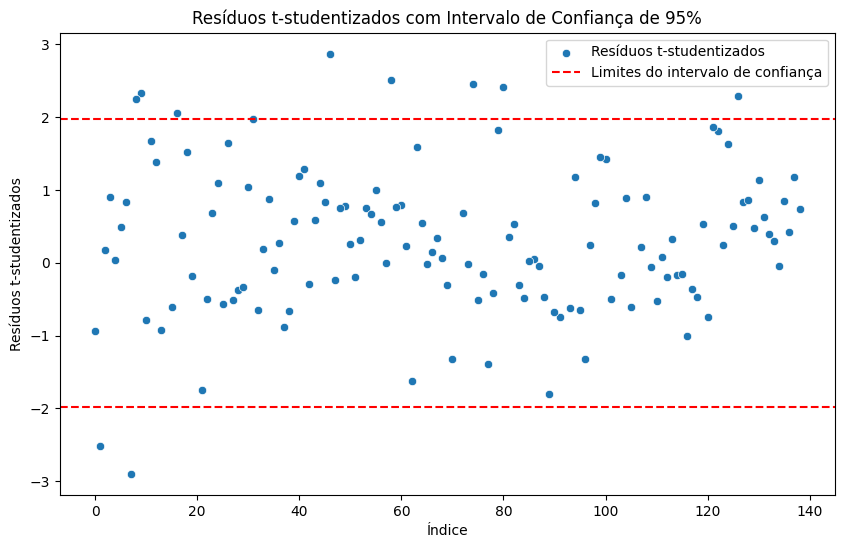

In [ ]:
# Calculando os resíduos
residuos = y_test - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(y_test)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

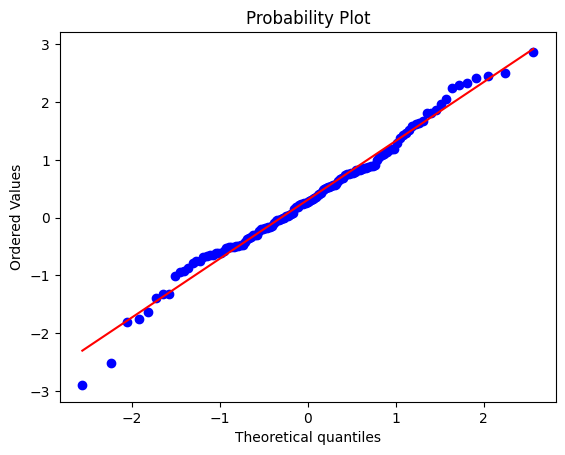

In [ ]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

Há uma grande quantidade de pontos fora do intervalo de confiança, o que pode ser um indicativo de que a suposição de erros gaussianos não é adequada, entretanto, quando avaliamos o gráfico de aderência, tal irregularidade aparenta ser menos significativa, com apenas dois pontos pissivelmente fora do que se consideraria ideal para a presunção da distribuição Gaussiana.

Vamos observar o modelo com mais componentes novamente, pode ser que a componente retirada explique variabilidade útil para o ajuste, apesar de ser, aparentemente, insignificante.

In [ ]:
# Aplicando PCA para reduzir a dimensionalidade para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Adicionando constante às variáveis do PCA para a inclusão do intercepto
X = sm.add_constant(X_pca)

# Ajustando um modelo de regressão linear simples
model = sm.OLS(y, X).fit()

# Printando o sumário do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.07e-42
Time:                        20:00:23   Log-Likelihood:                -103.81
No. Observations:                 140   AIC:                             215.6
Df Residuals:                     136   BIC:                             227.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5744      0.044    127.993      0.0

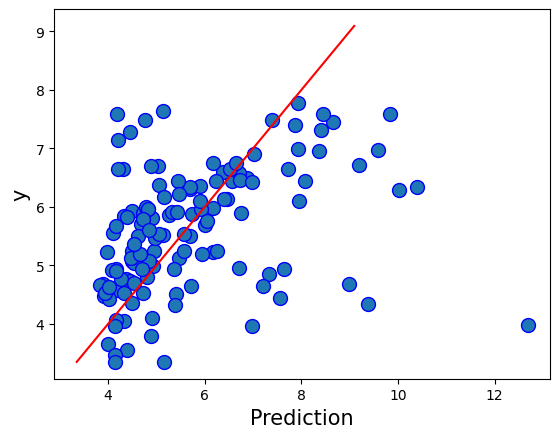

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.95 # fracao de elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r-')

plt.show(True)

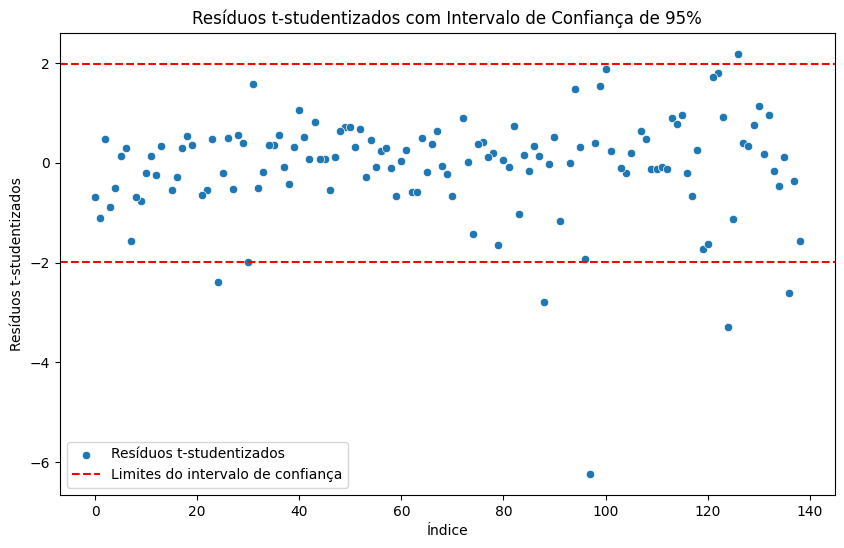

In [ ]:
# Calculando os resíduos
residuos = y_test - y_pred

# Calculando os resíduos t-studentizados
residuos_std = residuos / np.std(residuos)
n = len(y_test)
p = 1  # Número de preditores
residuos_t = residuos_std * np.sqrt((n - p - 1) / (n - p - residuos_std**2))

# Determinando os limites do intervalo de confiança de 95% da distribuição t de Student
t_limit = stats.t.ppf(0.975, df=n-p-1)

# Plotando os resíduos t-studentizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=residuos_t, label='Resíduos t-studentizados')
plt.axhline(y=t_limit, color='r', linestyle='--', label='Limites do intervalo de confiança')
plt.axhline(y=-t_limit, color='r', linestyle='--')

plt.xlabel('Índice')
plt.ylabel('Resíduos t-studentizados')
plt.title('Resíduos t-studentizados com Intervalo de Confiança de 95%')
plt.legend()
plt.show()

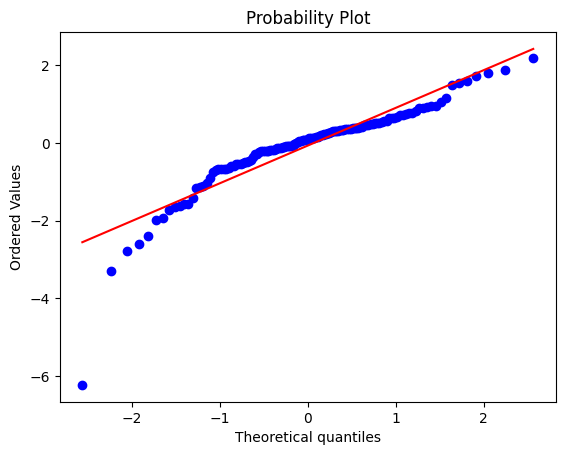

In [ ]:
ss.probplot(residuos_t, dist="norm", plot=pylab)
pylab.show()

Neste caso, tem-se que o modelo não é adequado para a suposição de normalidade dos erros, algo que pode ser verificado sobretudo no gráfico de aderência, onde observamos um comportamento não tão adequado para presumir a normalidade dos erros.